In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go



In [13]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [14]:
# x,y=make_regression(n_samples=100,n_features=2,n_informative=2,n_targets=1,noise=50)

x,y=make_regression(n_samples=100,n_features=2,n_informative=2,n_targets=1,noise=50)

# here, u will have to drop the uninformative one to train the model properly

# here x stores the features data and y stores the target data


In [15]:
df=pd.DataFrame({'col1':x[:,0],'col2':x[:,1],'target':y})
df

,col1,col2,target
0,-0.546955,1.121311,-37.128740
1,-1.080234,0.509744,-125.014332
2,-0.699304,-0.622710,-76.225657
3,-2.435705,0.892139,-43.271477
4,-0.755785,0.323549,-59.627327
...,...,...,...
95,0.190470,0.871259,49.304178
96,-0.484103,-0.563952,-23.956680
97,1.364790,-0.921239,103.066830
98,-0.769369,0.920766,-40.749750


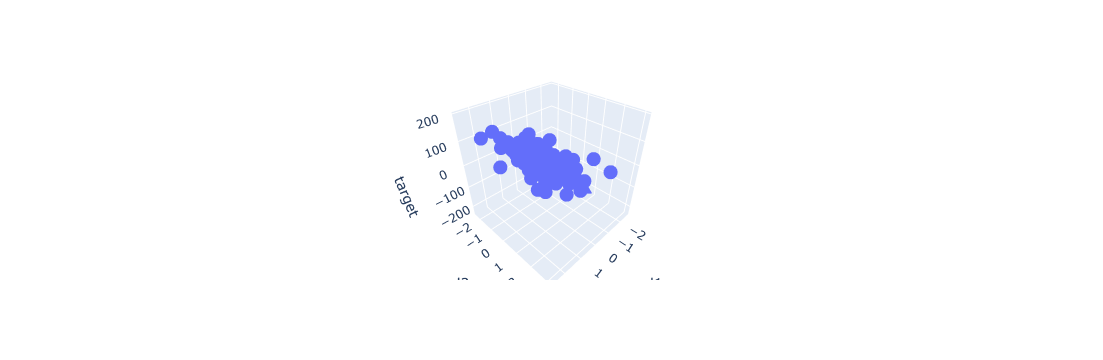

In [16]:
fig=px.scatter_3d(df,x='col1',y='col2',z='target')
fig.show()

In [17]:
from sklearn.model_selection import train_test_split

x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.3,random_state=2)

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [19]:
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(x_test)

In [21]:
# y_pred

print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 38.64562701756058
MSE 2526.1211237492416
R2 score 0.6752567571284489


In [22]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)

final = np.vstack((xGrid.ravel().reshape(1,100),
                   yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)
z = z_final


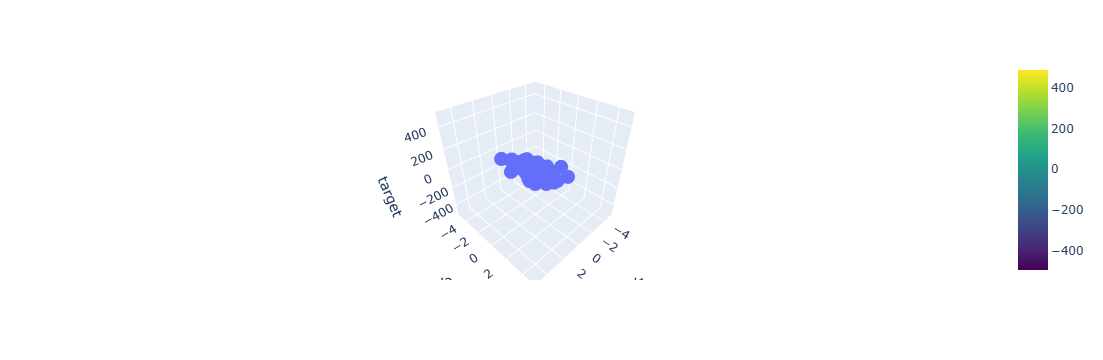

In [27]:
import plotly.express as px
import plotly.graph_objects as go

# 3D scatter of data
fig = px.scatter_3d(df, x='col1', y='col2', z='target')

# Regression surface
fig.add_trace(go.Surface(
    x = xGrid, 
    y = yGrid, 
    z = z, 
    colorscale="viridis", 
    
    opacity=0.6
))

fig.show()


In [28]:
lr.coef_ # beta 1 , beta 2 

array([68.35470341, 30.00783854])

In [30]:
lr.intercept_ # beta  nod

np.float64(-3.7258146525669673)